# Titanic: Machine Learning from Disaster

# 案例介绍
    泰坦尼克号的沉没是历史上伤亡人数最多、影响最深远的沉船事件之一。1912年4月15日，泰坦尼克号与冰山相撞，2224名乘客和船员中有1502人丧生。这场轰动性的悲剧震惊了国际社会，但也因此产生了更好的船舶安全法规。这次海难造成人员伤亡的原因之一是没有足够的救生艇供乘客和船员使用。
    
    虽然在沉船中幸存下来有一些运气因素，但有些人比其他人更可能存活下来。在本次学习中，在给定的部分存活人员信息中，将应用python来分析哪些乘客可能在悲剧中存活。此次，棕榈学院将携手Yiyu导师给各位想学习Python、想要在数据行业继续发展学习的同学来讲授如何完成这样一个project，相信会对你们的数据分析技能的提升大有裨益。

# 第三节课

## 更多的数据清理 -- 独热编码

In [308]:
# 从scikit-learn中引入OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [309]:
# 创建一个名为enc的OneHotEncoder对象
enc = OneHotEncoder()

In [310]:
# 创建一个名为onehot_features的list,并存放要进行编码的属性
onehot_features = ['Title','Sex_Code','Embarked_Code','AgeBin_Code','FareBin_Code']
# 对这些属性进行独热编码并且求得train_df[onehot_features]的均值等属性
enc.fit(train_df[onehot_features])

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [311]:
# 查看enc对象里各个分类编码过后的值
enc.categories_

[array([1., 2., 3., 4., 5.]),
 array([0., 1.]),
 array([0., 1., 2.]),
 array([0., 1., 2., 3., 4.]),
 array([0., 1., 2., 3.])]

In [312]:
# 创建一个名为enc_res的对象存放经过标准化处理后的独热编码的值
enc_res = enc.transform(train_df[onehot_features])

In [313]:
# 查看enc_res的值的情况
print(enc_res.toarray())

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 [0. 1. 0. ... 1. 0. 0.]
 ...
 [0. 1. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [314]:
# 查看enc_res的数据维度
print(enc_res.toarray().shape)

(891, 19)


## 特征选择&数据划分

In [315]:
# 选取不同变量，创建两个List（分别为原先的特征List和新的特征List）来分别存放特征
original_features = ['PassengerId','Pclass', 'Name', 'Sex', 'Age' ,'SibSp', 'Parch','Ticket','Fare', 'Cabin', 'Embarked']
new_features = ['Title','FamilySize','IsAlone','Sex_Code','Embarked_Code','AgeBin_Code','FareBin_Code']


In [316]:

final_features = ['Pclass','Age','SibSp','Parch','Fare','Title','FamilySize',
                  'IsAlone','Sex_Code','Embarked_Code','AgeBin_Code','FareBin_Code']
# 删去难以运用的变量&重复的变量
onehot_final = list(set(final_features) - set(onehot_features))

In [317]:
#打印出onehot_final变量的名称
onehot_final

['Pclass', 'SibSp', 'Age', 'Parch', 'Fare', 'IsAlone', 'FamilySize']

In [318]:
# 将原来数据里的final_features这些列存放到all_x里方便后面使用
all_x = train_df[final_features]
# 引入原先数据'survive'并且赋值y
y = train_df['Survived']
# 查看all_x前几行的信息
all_x.head()

,Pclass,Age,SibSp,Parch,Fare,Title,FamilySize,IsAlone,Sex_Code,Embarked_Code,AgeBin_Code,FareBin_Code
0,3,22.0,1,0,7.2500,1,2,0,1,2,1,0
1,1,38.0,1,0,71.2833,3,2,0,0,0,2,3
2,3,26.0,0,0,7.9250,2,1,1,0,2,1,1
3,1,35.0,1,0,53.1000,3,2,0,0,2,2,3
4,3,35.0,0,0,8.0500,1,1,1,1,2,2,1


In [319]:
# 将转换为数组的独热编码的值存放到onehot_added里
onehot_added = pd.DataFrame(enc_res.toarray())
# 使用pandas的concat函数将原数据中onehot_final这些列和onehot_added合并起来，concat函数专门用于连接两个或多个数组
# axis指定了合并的轴，此处axis=1意为逐列合并，若axis=0则为逐行合并；合并后的函数赋值为新的数据集all_x_2
all_x_2 = pd.concat([train_df[onehot_final],onehot_added],axis = 1)

In [320]:
# 查看all_x_2前几行的信息
all_x_2.head()

,Pclass,SibSp,Age,Parch,Fare,IsAlone,FamilySize,0,1,2,...,9,10,11,12,13,14,15,16,17,18
0,3,1,22.0,0,7.2500,0,2,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,1,38.0,0,71.2833,0,2,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,0,26.0,0,7.9250,1,1,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,1,35.0,0,53.1000,0,2,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3,0,35.0,0,8.0500,1,1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [321]:
#确认一下没有缺失值
all_x.isnull().sum()

Pclass           0
Age              0
SibSp            0
Parch            0
Fare             0
Title            0
FamilySize       0
IsAlone          0
Sex_Code         0
Embarked_Code    0
AgeBin_Code      0
FareBin_Code     0
dtype: int64

In [322]:
# 从scikit-learn中引入train_test_split
from sklearn.model_selection import train_test_split

In [323]:
# 对all_x进行数据集划分为训练集和测试集：xTrain为训练集数据，xTest为测试集数据
# y为数据集的标签（即该乘客是否存活），yTrain对应了训练集的标签，yTest对应了测试集的标签
# test_size=0.2表示测试集占总数据集的20%
xTrain, xTest, yTrain, yTest = train_test_split(all_x, y, test_size = 0.2, random_state = 0)

In [324]:
# 查看训练集和测试集的数据量
xTrain.shape, xTest.shape

((712, 12), (179, 12))

In [325]:
# 查看训练集标签数和测试集标签数
yTrain.shape,yTest.shape

((712,), (179,))

In [326]:
# 计算训练集中乘客存活率平均值和测试集中乘客存活率平均值
yTrain.mean(),yTest.mean()

(0.38342696629213485, 0.3854748603351955)

In [327]:
# 同样的对all_进行数据集划分
x2Train, x2Test, y2Train, y2Test = train_test_split(all_x_2, y, test_size = 0.2, random_state = 0)

## 理解&选择模型

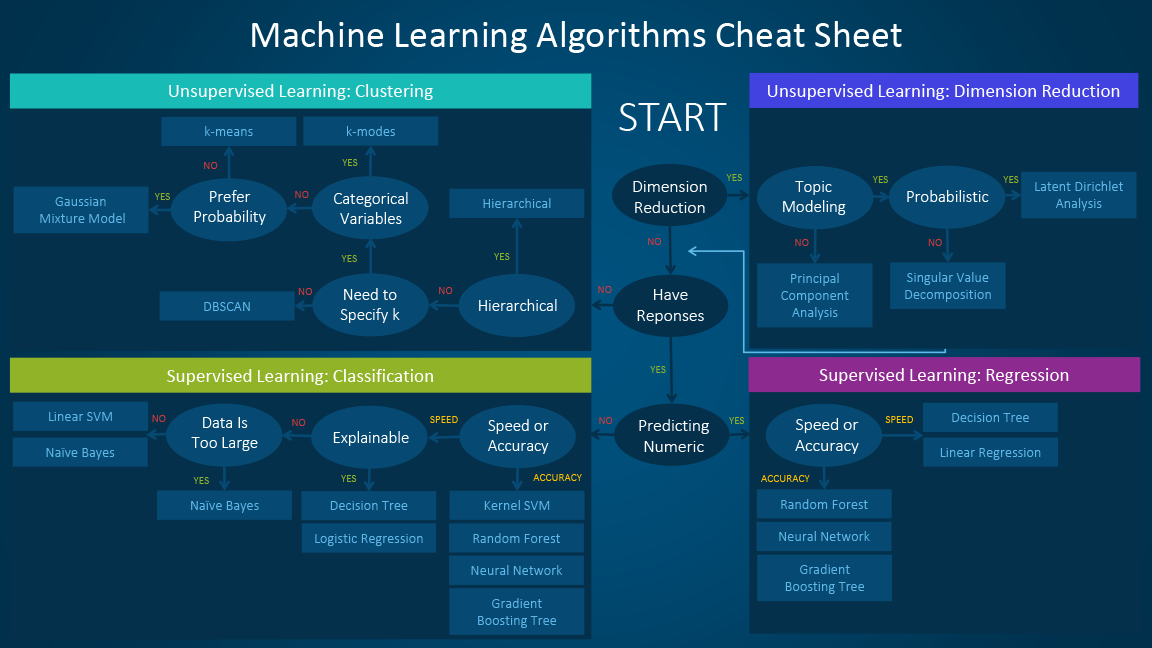

In [328]:
# 如何选择适合的机器学习模型，这里的函数目的是给大家引入一个模型图的概括表！这个对于各位有志于从事机器学习和数据分析行业的同学来讲是个大大的福利
# 在这张表里你可以全面地看到非监督学习和监督学习两种模式下最常用的Model们，收藏好哦！
Image(filename='models.png') 

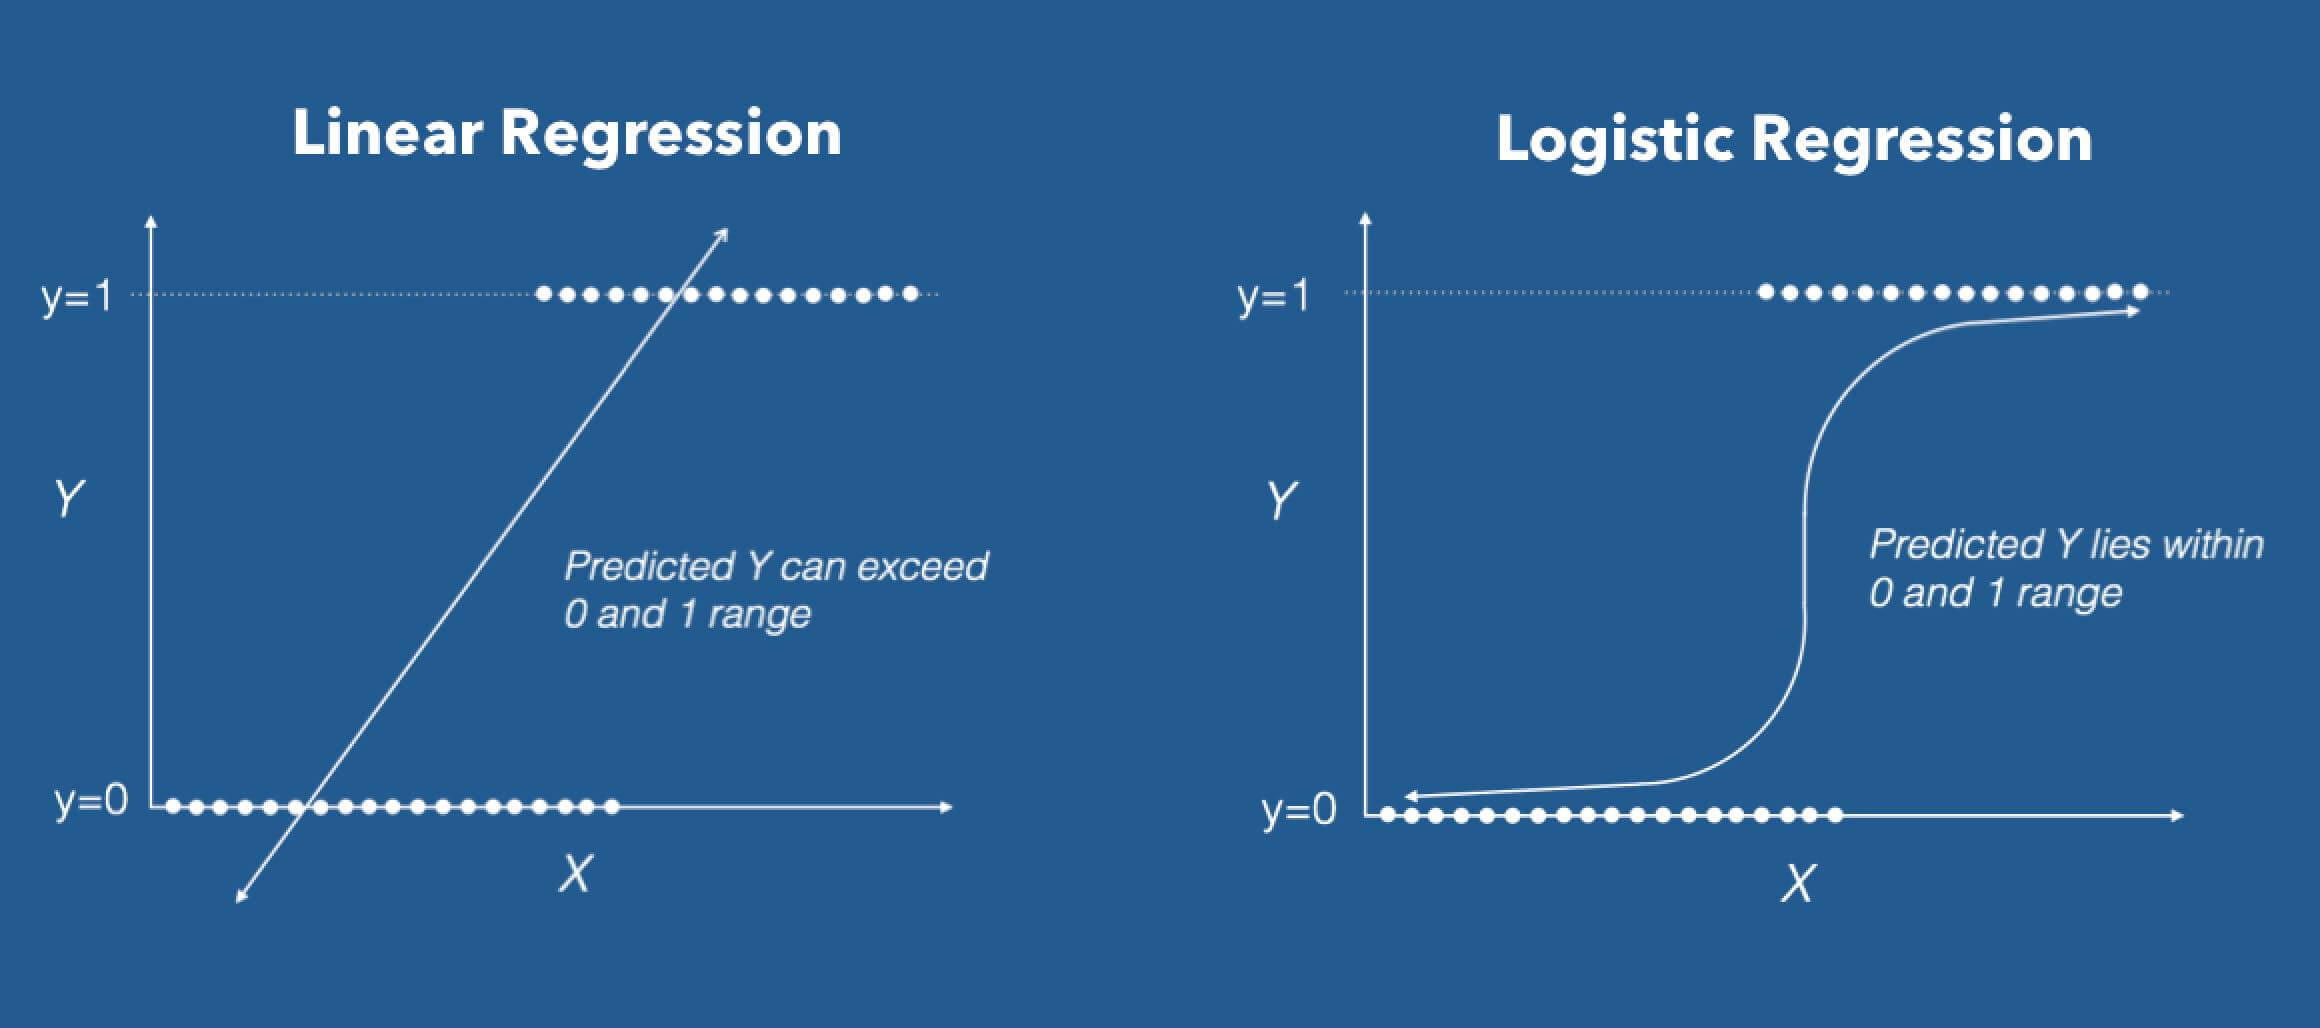

In [329]:
# logistic回归的例子，左边是线性回归的模型可视化呈现，右边是逻辑回归的模型可视化呈现
Image(filename='logr.jpg')

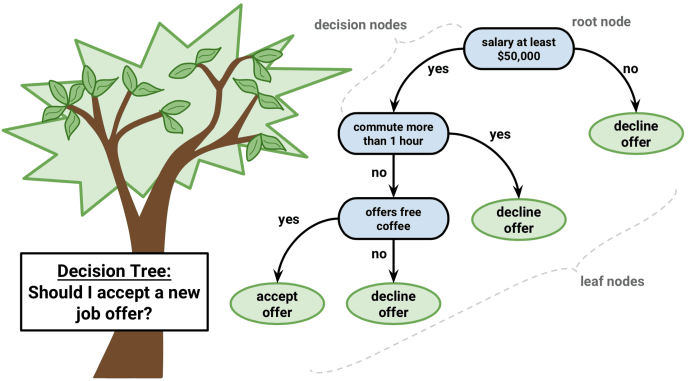

In [330]:
# 决策树的例子，决策树也是用于预测领域非常普遍的一个模型
Image(filename='decision.png')

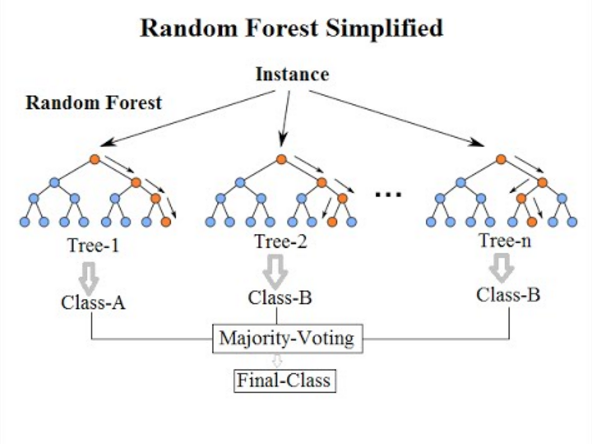

In [331]:
# 随机森林的例子
Image(filename='random.png')